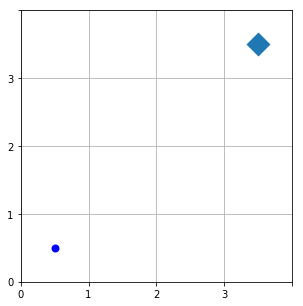

In [14]:
from MazeEnv import MazeGen
%matplotlib inline

maze = MazeGen(4,4)
maze.render()

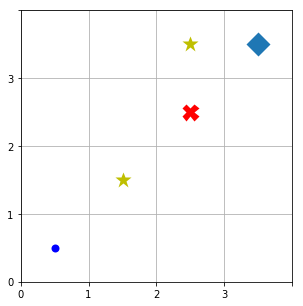

In [15]:
maze.set_grid(star=[1,1])
maze.set_grid(star=[2,3])
maze.set_grid(trap=[2,2])
maze.render()

In [16]:
import numpy as np
import random 
class MultiArmBandit():
    def __init__(self,env,epsilon=0):
        self._env = env
        self._epsilon = epsilon
        self._terminal_status = False
    
    def _check_avaiable_actions(self,loc):
        """ check avaiable actions on a loc """
        return self._env._avaiable_actions(loc)
    
    def _get_next_action(self,loc):
        """ greedy or epsilon greedy search
            if multiple actions found in greedy
            will take randomly              """
        action_list = self._check_avaiable_actions(loc)
        
        rand = random.random()
        
        if 0 <= rand <= self._epsilon:
            return random.choice(action_list)
        
        else:
            reward_list = []
            for action in action_list:
                reward_list.append(self._env._check_action_reward(action,loc)[1])
            index = random.choice(np.argwhere(reward_list == np.amax(reward_list)))[0]

            return action_list[index]
    
    def _apply_action(self,action,loc):
        loc_1 = self._env._apply_action(action,loc)
        
        if "terminal" in self._env._get_state_info(loc_1):
            self._terminal_status = True

        return loc_1
    
    def render(self,figsize=(10,5)):
        self._env.render(figsize)
    
    def run_algorithm(self):
        self._env.reset()
        self.loc_record = []
        self.reward_record = []
        self.action_record = []
        
        while self._terminal_status is not True:
            loc = self._env._player # current loc
            self.loc_record.append(loc) # update loc list
            
            action = self._get_next_action(loc) # pick action
            self.action_record.append(action)
            
            loc_1 = self._apply_action(action,loc) # action taken
            self._env._player = loc_1
            
            r = self._env._check_reward(loc_1) 
            self.reward_record.append(r) # update reward list
            
            self.render()
            
        self.loc_record.append(self._env._player) # add last loc outside of loop
        
        

    

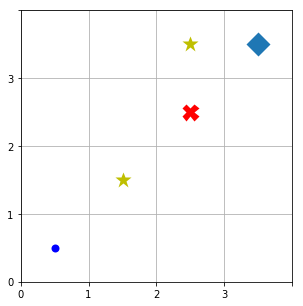

In [17]:
alg = MultiArmBandit(maze)
alg.render()

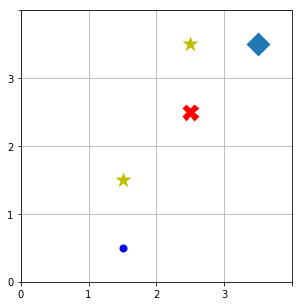

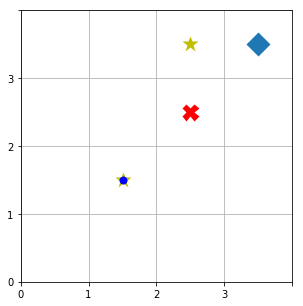

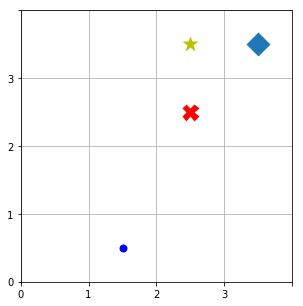

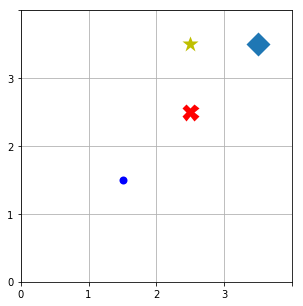

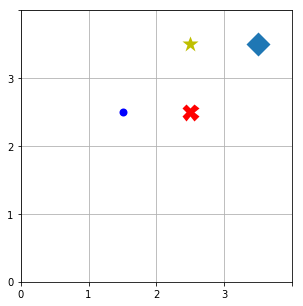

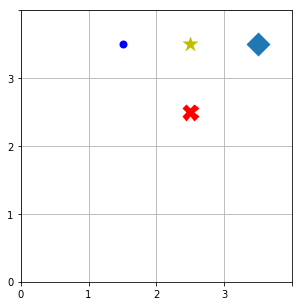

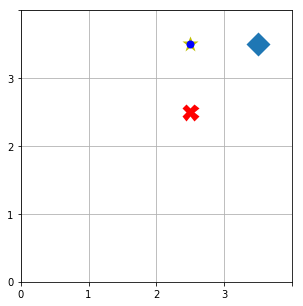

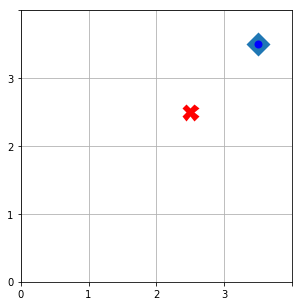

In [13]:
alg.run_algorithm()